In [1]:
import glob

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from elecpy.elecpySession import ElecpySession
import pandas as pd

%matplotlib inline

In [3]:
src_dir = '/mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults/'
save_dir = '/mnt/Omer/Project/01.PhaseDiscontinuity/AnalysisResults/2019-03-31/'
print(save_dir)
if not os.path.exists(save_dir) : os.mkdir(save_dir)

/mnt/Omer/Project/01.PhaseDiscontinuity/AnalysisResults/2019-03-31/


In [72]:
df = pd.DataFrame( {
    'setting' : ['original', '(1)', '(2)', '(3)'] ,
    'session_id' : ['20190331-1','20190331-2','20190331-3','20190331-4'],
    'case_id' : ['Mahajan', 'A', 'B', 'C, D'],
    'simu_id' : [None, '20190226-3', '20180616-1', '20180625-1']
    
})
df

,case_id,session_id,setting,simu_id
0,Mahajan,20190331-1,original,None
1,A,20190331-2,(1),20190226-3
2,B,20190331-3,(2),20180616-1
3,"C, D",20190331-4,(3),20180625-1


In [39]:
!cat ../data.whole.csv

sim_id,gna,gkr,gks,description
20190226-3,12.0,0.0125,0.1386, pinning (short WL & lateralization) <<< 20190226-2 <<< 20171128-1
20180625-1,15.6,0.0088,0.09702,APD prolongation <<< 20171128-1
20180616-1,10.0,0.0125,0.1386,vortex shedding <<< 20171128-1

In [41]:
!cat ./elecpy/temp/pacing_params.json

{
    "time" : {
        "dt" :0.005,
        "log_cnt" : 200
    },
    "cell_type" : "mahajan",
    "cell_param":{},
    "stim" : {
        "start": 0.0,
        "duration": 0.5,
        "interval": 400.0,
        "train" : 5,
        "amplitude": -80.0
    }
}


## Mahajan

In [43]:
!cat ./elecpy/cell/mahajan/kernel.c | grep gca_
!cat ./elecpy/cell/mahajan/kernel.c | grep gtof_
!cat ./elecpy/cell/mahajan/kernel.c | grep gtos_
!cat ./elecpy/cell/mahajan/kernel.c | grep " _dh "
!cat ./elecpy/cell/mahajan/kernel.c | grep " _dj "

!cat ./elecpy/cell/mahajan/const.py | grep gna_
!cat ./elecpy/cell/mahajan/const.py | grep gkr_
!cat ./elecpy/cell/mahajan/const.py | grep gks_

double _gca = {gca_} * pow({Q10CAL_}, (temp-{temp_})/10.0)/1.4;
double _gtof = {gtof_} * pow({Q10TO_}, (temp-{temp_})/10.0)*1.4;
double _gtos = {gtos_} * pow({Q10TO_}, (temp-{temp_})/10.0)*1.4;
double _dh = (_ah*(1.00000-h) - _bh*h)*1.4;
_h = h + _dh * dt;
double _dj = (_aj*(1.00000-j) - _bj*j)*1.4;
_j = j + _dj * dt;
  'gna_'         : 12.0              , #
  'gkr_'         : 0.0125            , #
  'gks_'         : 0.13860           , #


In [44]:
!python ./elecpy/cell/test.py -p ./elecpy/temp/pacing_params.json -d /mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults/20190331-1/

cell models pacing test.
-------------100
v: -23.8698244628
it: 0.621808829083
st: 0.0
-------------200
v: -85.8303708633
it: 0.0289504432419
st: 0.0
-------------300
v: -87.0631974576
it: 0.00507932166906
st: 0.0
-------------400
v: -87.3767648386
it: 0.00191293184172
st: 0.0
-------------500
v: -62.6063532211
it: 1.22181970832
st: 0.0
-------------600
v: -87.121890853
it: 0.00695109449892
st: 0.0
-------------700
v: -87.4502610951
it: 0.00158525767566
st: 0.0
-------------800
v: -87.5581246368
it: 0.00073715069655
st: 0.0
-------------900
v: -66.4412752081
it: 1.276678968
st: 0.0
-------------1000
v: -87.2347367393
it: 0.00580338778267
st: 0.0
-------------1100
v: -87.5044886309
it: 0.00128897130322
st: 0.0
-------------1200
v: -87.5927721472
it: 0.000609882561228
st: 0.0
-------------1300
v: -76.8605934342
it: 1.03696325186
st: 0.0
-------------1400
v: -87.3496585649
it: 0.00423900460246
st: 0.0
-------------1500
v: -87.5518502138
it: 0.00100406664141
st: 0.0
-------------1600
v: -8

## A

In [45]:
!cat ./elecpy/cell/mahajan/kernel.c | grep gca_
!cat ./elecpy/cell/mahajan/kernel.c | grep gtof_
!cat ./elecpy/cell/mahajan/kernel.c | grep gtos_
!cat ./elecpy/cell/mahajan/kernel.c | grep " _dh "
!cat ./elecpy/cell/mahajan/kernel.c | grep " _dj "

!cat ./elecpy/cell/mahajan/const.py | grep gna_
!cat ./elecpy/cell/mahajan/const.py | grep gkr_
!cat ./elecpy/cell/mahajan/const.py | grep gks_

double _gca = {gca_} * pow({Q10CAL_}, (temp-{temp_})/10.0)/1.9;
double _gtof = {gtof_} * pow({Q10TO_}, (temp-{temp_})/10.0)*1.9;
double _gtos = {gtos_} * pow({Q10TO_}, (temp-{temp_})/10.0)*1.9;
double _dh = (_ah*(1.00000-h) - _bh*h)*1.9;
_h = h + _dh * dt;
double _dj = (_aj*(1.00000-j) - _bj*j)*1.9;
_j = j + _dj * dt;
  'gna_'         : 12.0              , #
  'gkr_'         : 0.0125            , #
  'gks_'         : 0.13860           , #


In [46]:
!python ./elecpy/cell/test.py -p ./elecpy/temp/pacing_params.json -d /mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults/20190331-2/

cell models pacing test.
-------------100
v: -62.2013415022
it: 1.01254861006
st: 0.0
-------------200
v: -86.7307068739
it: 0.0119881324221
st: 0.0
-------------300
v: -87.3059791156
it: 0.0027446847779
st: 0.0
-------------400
v: -87.4869726914
it: 0.00118595095071
st: 0.0
-------------500
v: -86.4178496406
it: 0.0381409987093
st: 0.0
-------------600
v: -87.4645636961
it: 0.00223497589185
st: 0.0
-------------700
v: -87.5851493165
it: 0.000688422796205
st: 0.0
-------------800
v: -87.6353944173
it: 0.000368516620289
st: 0.0
-------------900
v: -86.5960339562
it: 0.0355072628638
st: 0.0
-------------1000
v: -87.537982411
it: 0.00177827282315
st: 0.0
-------------1100
v: -87.6298660092
it: 0.000506532753906
st: 0.0
-------------1200
v: -87.6669073625
it: 0.00027391955158
st: 0.0
-------------1300
v: -86.8592112534
it: 0.0265247097244
st: 0.0
-------------1400
v: -87.5853570771
it: 0.00138210975532
st: 0.0
-------------1500
v: -87.6571596963
it: 0.000399851064543
st: 0.0
-------------1

## B

In [70]:
!cat ./elecpy/cell/mahajan/kernel.c | grep gca_
!cat ./elecpy/cell/mahajan/kernel.c | grep gtof_
!cat ./elecpy/cell/mahajan/kernel.c | grep gtos_
!cat ./elecpy/cell/mahajan/kernel.c | grep " _dh "
!cat ./elecpy/cell/mahajan/kernel.c | grep " _dj "

!cat ./elecpy/cell/mahajan/const.py | grep gna_
!cat ./elecpy/cell/mahajan/const.py | grep gkr_
!cat ./elecpy/cell/mahajan/const.py | grep gks_

double _gca = {gca_} * pow({Q10CAL_}, (temp-{temp_})/10.0)/1.4;
double _gtof = {gtof_} * pow({Q10TO_}, (temp-{temp_})/10.0)*1.4;
double _gtos = {gtos_} * pow({Q10TO_}, (temp-{temp_})/10.0)*1.4;
double _dh = (_ah*(1.00000-h) - _bh*h)*1.4;
_h = h + _dh * dt;
double _dj = (_aj*(1.00000-j) - _bj*j)*1.4;
_j = j + _dj * dt;
  'gna_'         : 10.0              , #
  'gkr_'         : 0.0125            , #
  'gks_'         : 0.13860           , #


In [71]:
!python ./elecpy/cell/test.py -p ./elecpy/temp/pacing_params.json -d /mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults/20190331-3/

cell models pacing test.
-------------100
v: -23.7784383903
it: 0.620788705073
st: 0.0
-------------200
v: -85.8291659706
it: 0.0289813319079
st: 0.0
-------------300
v: -87.0627065648
it: 0.005082386981
st: 0.0
-------------400
v: -87.3764588483
it: 0.00191400104228
st: 0.0
-------------500
v: -60.8738891337
it: 1.19449797186
st: 0.0
-------------600
v: -87.1080008867
it: 0.0071894253706
st: 0.0
-------------700
v: -87.4459185562
it: 0.00162051778202
st: 0.0
-------------800
v: -87.55591804
it: 0.000750030779087
st: 0.0
-------------900
v: -64.73375056
it: 1.26538707659
st: 0.0
-------------1000
v: -87.2224744846
it: 0.00600016544933
st: 0.0
-------------1100
v: -87.5003007058
it: 0.00132041286783
st: 0.0
-------------1200
v: -87.5905425788
it: 0.000622065403282
st: 0.0
-------------1300
v: -75.5416075956
it: 1.1165967195
st: 0.0
-------------1400
v: -87.3404270432
it: 0.00437274085349
st: 0.0
-------------1500
v: -87.5483325076
it: 0.00102796350104
st: 0.0
-------------1600
v: -87.61

## C,D

In [78]:
!cat ./elecpy/cell/mahajan/kernel.c | grep gca_
!cat ./elecpy/cell/mahajan/kernel.c | grep gtof_
!cat ./elecpy/cell/mahajan/kernel.c | grep gtos_
!cat ./elecpy/cell/mahajan/kernel.c | grep " _dh "
!cat ./elecpy/cell/mahajan/kernel.c | grep " _dj "

!cat ./elecpy/cell/mahajan/const.py | grep gna_
!cat ./elecpy/cell/mahajan/const.py | grep gkr_
!cat ./elecpy/cell/mahajan/const.py | grep gks_

double _gca = {gca_} * pow({Q10CAL_}, (temp-{temp_})/10.0)/1.0;
double _gtof = {gtof_} * pow({Q10TO_}, (temp-{temp_})/10.0)*1.0;
double _gtos = {gtos_} * pow({Q10TO_}, (temp-{temp_})/10.0)*1.0;
double _dh = (_ah*(1.00000-h) - _bh*h)*1.4;
_h = h + _dh * dt;
double _dj = (_aj*(1.00000-j) - _bj*j)*1.4;
_j = j + _dj * dt;
  'gna_'         : 15.6              , #
  'gkr_'         : 0.0088            , #
  'gks_'         : 0.09702           , #


In [79]:
!python ./elecpy/cell/test.py -p ./elecpy/temp/pacing_params.json -d /mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults/20190331-4/

cell models pacing test.
-------------100
v: 9.22421016315
it: 0.327261450095
st: 0.0
-------------200
v: -60.9570371077
it: 1.24644842832
st: 0.0
-------------300
v: -86.6354526677
it: 0.0100105835986
st: 0.0
-------------400
v: -87.1129017755
it: 0.00206402626726
st: 0.0
-------------500
v: 8.14070066652
it: 0.346922804144
st: 0.0
-------------600
v: -65.8102972176
it: 1.26043824267
st: 0.0
-------------700
v: -86.6070168396
it: 0.0102485781254
st: 0.0
-------------800
v: -87.098814002
it: 0.00211320396992
st: 0.0
-------------900
v: 7.99636572255
it: 0.349617113826
st: 0.0
-------------1000
v: -66.3704285778
it: 1.25512994492
st: 0.0
-------------1100
v: -86.5984199782
it: 0.0102621827154
st: 0.0
-------------1200
v: -87.0905646929
it: 0.00212113627839
st: 0.0
-------------1300
v: 7.87591614105
it: 0.352167090277
st: 0.0
-------------1400
v: -66.8509569972
it: 1.25034465773
st: 0.0
-------------1500
v: -86.5922386619
it: 0.0103338585011
st: 0.0
-------------1600
v: -87.0881133429
it

## plot

In [80]:
def calc_apd(vmem, r_thre=0.9):
    vmem_thre = (1-r_thre)*vmem.max() + r_thre*vmem.min()
    flag_on = False
    apd = None
    for f, v in enumerate(vmem):
        if not flag_on:
            if v > vmem_thre:
                flag_on = True
                f_start = f
        else:
            if v < vmem_thre:
                apd = f - f_start
                break
    return vmem_thre, f_start, apd 

In [81]:
def calc_max_dvdt(vmem):
    vmem_diff = np.zeros_like(vmem)
    vmem_diff[1:] = vmem[1:] - vmem[:-1]
    return max(vmem_diff)

In [82]:
vmem_all = {}

for i, row in df.iterrows():
    
    #if i not in [1,2,3]: continue
        
    path = '{0}/{1}/*/v.npy'.format(src_dir, row['session_id'])
    print path
    files = sorted( glob.glob(path))

    vmem = np.array([np.load(f)[0,0] for f in files[:1000]])
    vmem_all[row['setting']] = vmem

/mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults//20190331-1/*/v.npy
/mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults//20190331-2/*/v.npy
/mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults//20190331-3/*/v.npy
/mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults//20190331-4/*/v.npy


In [83]:
for i, row in df.iterrows():    
    if i == 0: continue
    key = row['setting']
    vmem = vmem_all[key][offset:offset+300]
    print key, len(vmem)

(1) 300
(2) 300
(3) 300


original 22.7074962398 110
(1) 11.9938240299 64
(2) 18.7484675344 112
(3) 29.6284253138 207


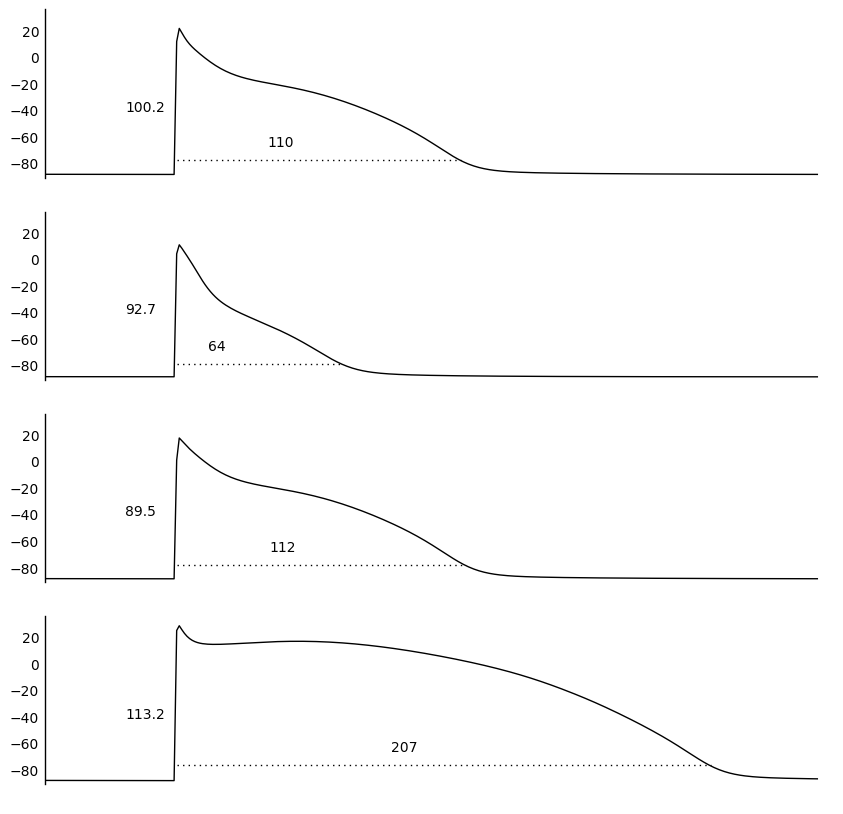

In [91]:
linestyles = ['solid', 'dotted', 'dashed', 'solid']
plt.subplots_adjust(hspace=0.6)
plt.figure(figsize=(10,10))
for i, row in df.iterrows():    
    #if i == 0: continue
    plt.subplot(4, 1, i+1)
    offset = 400*1-50
    key = row['setting']
    vmem = vmem_all[key][offset:offset+300]
    vmem_thre, f_start, apd = calc_apd(vmem, r_thre=0.9)
    max_dvdt = calc_max_dvdt(vmem)
    
    print key, vmem.max(), apd
    
    #plt.title(key, loc='left')
    plt.plot(vmem, c='k')#, linestyle=linestyles[i])
    plt.plot([f_start, f_start+apd], [vmem_thre, vmem_thre], c='k', linestyle='dotted')
    
    plt.text(f_start+apd/2 - 20, vmem_thre+10, '{0}'.format(apd))
    plt.text(f_start-20, -40, '{0:.1f}'.format(max_dvdt))
    plt.ylim([-90, 37])
    plt.xticks(color="None")
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tick_params(length=0)
    #plt.gca().spines['left'].set_visible(False)
    #plt.xlabel('time [ms]')
    #plt.ylabel('Vm [mV]')
    #plt.legend()
#plt.xticks(color="k")
#plt.xlabel('time [msec]')